In [18]:
import os
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *

No switching cost

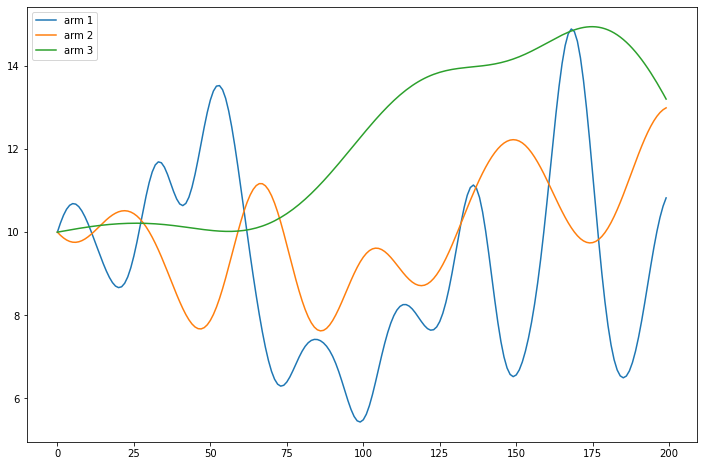

In [19]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)+10  #generate three arms
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)+10
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)+10

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [20]:
N = 100
T = 200

DTS_record=[]
UCB_record=[]
GPR_record=[]

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=16,variance=5,Smooth=True,Plot=False)
  arm3=expect_reward_generator(T,lengthscale=32,variance=5,Smooth=True,Plot=False)

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_DTS=DTS(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  DTS_record.append(regret_holder_DTS)
  UCB_record.append(regret_holder_UCB)
  GPR_record.append(regret_holder_GPR_mismatch)

100% |########################################################################|


In [21]:
DTS_record=np.array(DTS_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)


# np.savetxt('result/experiment1 data/DTS_record.csv', DTS_record, delimiter=',')
# np.savetxt('result/experiment1 data/UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('result/experiment1 data/GPR_record.csv', GPR_record, delimiter=',')

Experiment 2 

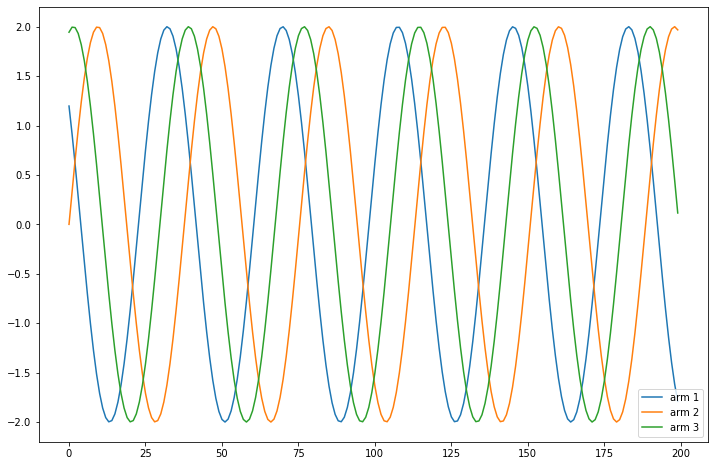

In [22]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [23]:
DTS_record=[]
UCB_record=[]
GPR_record=[]


arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,4,Plot=False)

arms=[arm1,arm2,arm3]
max_reward = np.maximum.reduce(arms)
C=np.sum(np.abs(np.maximum.reduce(arms)))

N = 100
T = 200

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_DTS=DTS(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  DTS_record.append(regret_holder_DTS)
  UCB_record.append(regret_holder_UCB)
  GPR_record.append(GPR_record)
   


100% |########################################################################|


In [26]:
DTS_record=np.array(DTS_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)

# np.savetxt('DTS_record.csv', DTS_record, delimiter=',')
# np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('GPR_record.csv', GPR_record, delimiter=',')


Switching cost is non-negative

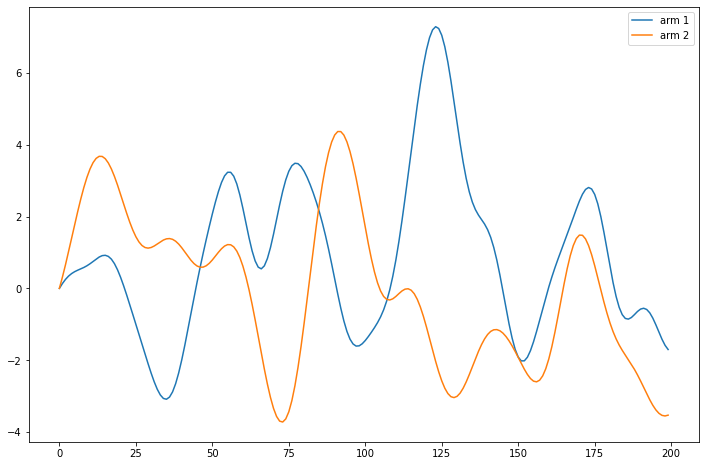

In [4]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=10,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.legend()

In [24]:
C_holder = [0, 0.75, 1.5, 5 ]

In [29]:
for C in C_holder:
  
  regret_GPRTS = []
  regret_DPTS = []
  regret_DPPM = []

  C = 0.25
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder1,_=GPR_fit(T, 'RBF',C,arm1,arm2)
    regret_holder2,_=GPR_DP(T,C, arm1,arm2, TS= True)
    regret_holder3,_=GPR_DP(T,C, arm1,arm2, TS= False)
    

    regret_GPRTS.append(regret_holder1/Normal)
    regret_DPTS.append(regret_holder2/Normal)
    regret_DPPM.append(regret_holder3/Normal)
    

  regret_record1 = np.array(regret_GPRTS).reshape(N,T)
  regret_record2 = np.array(regret_DPTS).reshape(N,T)
  regret_record3 = np.array(regret_DPPM).reshape(N,T)

  # np.savetxt('result/experiment3 data/GPRTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  # np.savetxt('result/experiment3 data/DPTS_cost'+str(C)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment3 data/DPPM_cost'+str(C)+'.csv', regret_record3, delimiter=',')


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Experiment with discount factor

In [26]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

In [27]:
for df in discount_factor_holder:
  
  regret_GPRTS = []
  regret_DPTS = []
  regret_DPPM = []

  

  C = 10
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder1,_=GPR_fit(T, 'RBF',C, arm1,arm2) 
    regret_holder2,_=GPR_DP(T,C, arm1,arm2, discount_factor=df,TS=True)
    regret_holder3,_=GPR_DP(T,C, arm1,arm2, discount_factor=df,TS=False)
    
    regret_GPRTS.append(regret_holder1/Normal)
    regret_DPTS.append(regret_holder2/Normal)
    regret_DPPM.append(regret_holder3/Normal)
    

    
  regret_record1=np.array(regret_GPRTS).reshape(N,T)
  regret_record2=np.array(regret_DPTS).reshape(N,T)
  regret_record3=np.array(regret_DPPM).reshape(N,T)
  
  


  # np.savetxt('result/experiment4 data/ GPRTS_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment4 data/ DPTS_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment4 data/ DPPR_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |#############################################

Robust or not?

In [30]:
C_holder = [0, 0.25, 0.75, 1.5, 5, 7.5, 10, 20, 30]

In [33]:
for C in C_holder:
  
  choice_holder1 = []
  choice_holder2 = []
  choice_holder3 = []
  
  N = 250


  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=16,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder1,choice1=GPR_DP(T,C, arm1,arm2,TS=True)
    regret_holder2,choice2=GPR_DP(T,C, arm1,arm2,TS=False)
    regret_holder3,choice3 = GPR_fit(T, 'RBF', C, arm1, arm2)
    
    choice_holder1.append(choice1)
    choice_holder2.append(choice2)
    choice_holder3.append(choice3)
  
  
    
  choice_record1 = np.array(choice_holder1).reshape(N,T)  
  choice_record2 = np.array(choice_holder2).reshape(N,T)  
  choice_record3 = np.array(choice_holder3).reshape(N,T)  
    
  # np.savetxt('DPTS_cost'+str(C)+'.csv', choice_record1, delimiter=',')
  # np.savetxt('DPPM_cost'+str(C)+'.csv', choice_record2, delimiter=',')
  # np.savetxt('GPRTS_cost'+str(C)+'.csv', choice_record3, delimiter=',')
  


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


In [11]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment5 data/GPRTS_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record1)/(N*T),4))

51.48
50.778
53.022
49.44
49.382
50.926
50.352
50.766
48.9


In [16]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment5 data/DPTS_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record1)/(N*T),2))

50.75
51.29
54.2
50.05
50.67
51.63
51.25
50.91
47.32


In [17]:
for C in C_holder:

    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment5 data/DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    print(round(100*np.sum(regret_record2)/(N*T),2))

56.75
59.53
61.0
58.31
59.9
65.22
67.56
80.31
93.54
